# Library

In [1]:
## For loading the pickle
import pandas as pd
## Numpy for the heatmap
import numpy as np
## Displaying the heatmap
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
## Clear Output
from IPython.display import clear_output

# Data Spawn

In [2]:
spawn_region = 100
## Read the dataframe
df = pd.read_pickle("../../data/ufficial/pickle/kills.pkl").\
        rename(columns={
            "killer_name" : "Killer",
            "victim_name" : "Victim",
            "weapon" : "Items"
        })
dfNoNaN = df.dropna(how='any',axis=0)

## Values we want
#[["x_death", "z_death"]]

In [20]:
## Taking only the values we need
data_us = dfNoNaN[((dfNoNaN.x_death > -spawn_region) 
              & (dfNoNaN.x_death < spawn_region)) 
              & ((dfNoNaN.z_death > -spawn_region) 
              & (dfNoNaN.z_death < spawn_region))]
## Create map
data = np.vstack([data_us["x_death"].values, data_us["z_death"].values])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(spawn_region, -spawn_region, 100)
ygrid = np.linspace(spawn_region, -spawn_region, 100)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower',
           extent=[-spawn_region, spawn_region, -spawn_region, spawn_region],
           cmap=plt.cm.jet)
## informations
plt.title('Heatmap of death from -100 to 100')
plt.xlabel('x')
plt.ylabel('z')
plt.show()
clear_output()

# Data World
## Y Death

In [4]:
yClass = pd.DataFrame({
    "Y": [],
    "Perc": []
})
## Print it 
for value, perc in (dfNoNaN.y_death.value_counts(normalize=True) * 100).items():
    print("Y: %f Perc: %s %%" % (value, round(perc, 3)))
    yClass = yClass.append({"Perc": perc, "Y": value}, ignore_index=True)
clear_output()

In [5]:
yClass = yClass.set_index("Y")
## Export this
yClass.to_csv("../../results/kills/yClass.csv")

## Top 5 y

In [3]:
## Algo for creating the graph
def createGraph(top5):
    ## Use this style for the plot
    plt.style.use("ggplot")
    ## Incr the size
    plt.figure(figsize=(15,7))
    ## Put it on the graph
    plt.barh(top5.index.astype(str), top5.values)
    ## Order it
    plt.gca().invert_yaxis()

    ## Add %
    for index, value in enumerate(top5):
        plt.text(value, index, " %" + str(value) )

    ## Show
    plt.show()

In [7]:
def createFiles(want, registredKills):
    genClass = pd.DataFrame({
        want: [],
        "Num": [],
        "Perc": []
    })
    rif = df[want].value_counts()
    ## Print killers 
    for value, num in rif.items():
        print(want + ": %s Num: %d Perc: %f %%" % (value, num, num / registredKills * 100))
        genClass = genClass.append({"Num": num, "Perc": num / registredKills * 100, "want": value}, ignore_index=True)
    clear_output()
    kClass = genClass.set_index(want)
    ## Export this
    kClass.to_csv("../../results/kills/%sClass.csv" % (want))
    ## Graph first 5 killers
    createGraph(((rif / registredKills * 100)[:5].round(3))[:5].round(3))

In [5]:
## Take first 5 y
createGraph((dfNoNaN.y_death.value_counts(normalize=True) * 100)[:5].round(3))
clear_output()

## Lowest and Highest Y, X and Z

In [8]:
print("X: Min: %f Max: %f\n" \
      "Y: Min: %f Max: %f\n" \
      "Z: Min: %f Max: %f" % 
      (df.x_death.min(), df.x_death.max(),
       df.y_death.min(), df.y_death.max(),
       df.z_death.min(), df.z_death.max()))
clear_output()

## Most kills + Death

### N^ registred kills

In [10]:
registredKills = df["Killer"].value_counts().sum()
print(registredKills)

55511


### Killer Data

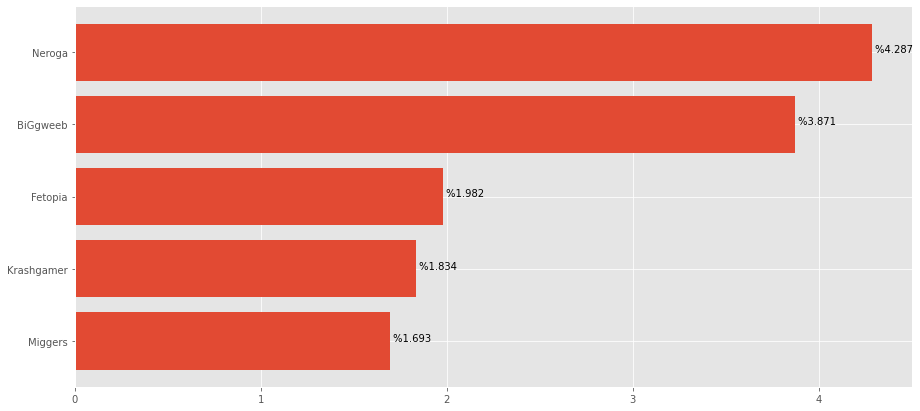

In [12]:
createFiles("Killer", registredKills)

### Victim Data

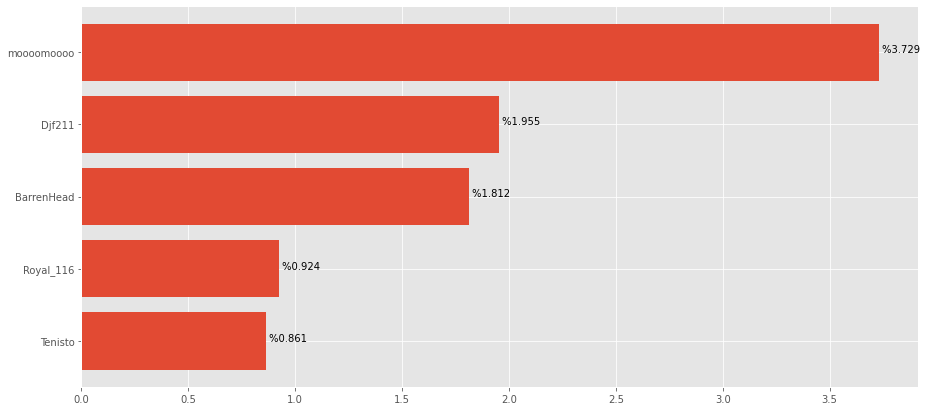

In [13]:
createFiles("Victim", registredKills)

### Item

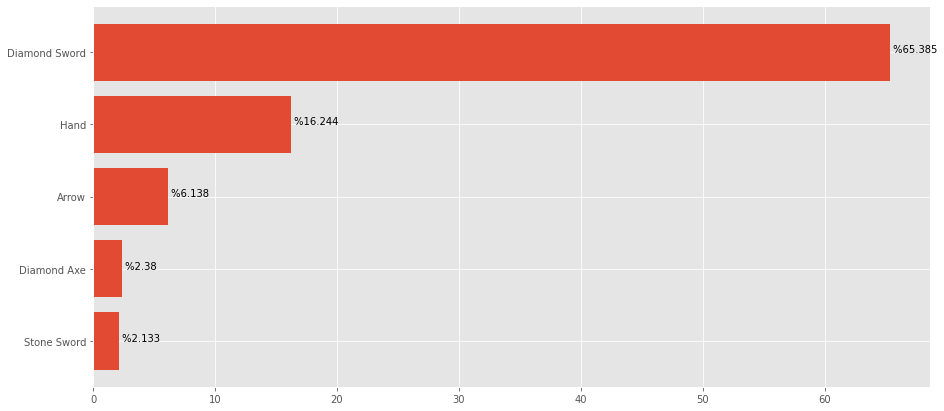

In [18]:
createFiles("Items", registredKills)

## Who killed the most at spawn

In [21]:
## We can use what we used before, so we can already start with graph
spawnKiller = data_us["Killer"].value_counts()
sClass = pd.DataFrame({
    "Killer": [],
    "Num": [],
    "Perc": []
})
## Print killers 
for value, num in spawnKiller.items():
    print("Killer: %s Num: %d Perc: %f %%" % (value, num, num / registredKills * 100))
    sClass = sClass.append({"Num": num, "Perc": num / registredKills * 100, "Killer": value}, ignore_index=True)
clear_output()

In [22]:
#sClass = sClass.set_index("Killer")
## Export this
sClass.to_csv("../../results/kills/spawnClass.csv")

In [23]:
## Graph 5 spawnKiller
createGraph(((spawnKiller / spawnKiller.sum() * 100)[:5].round(3))[:5].round(3))
clear_output()